<a href="https://colab.research.google.com/github/dertt33/Atmospheric-Muon-Simulation/blob/main/Atmospheric-Muon-Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Single Muon Energy vs Altitude

Energy at Sea Level: 3335.7522314854073


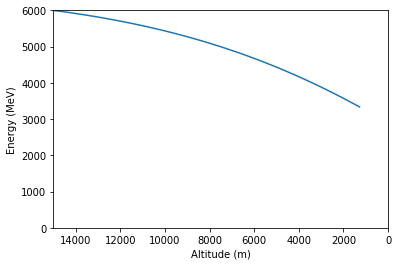

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
import math

#Constants

Erest = 105.6583745  # Rest Energy of a Muon in MeV
c = 3 * (10**10)  # Speed of light in cm/s
p0 = 101325 # Standard pressure at sea level in Pa     
T0 = 288.15  # Standard Temperature at sea level in Kelvins
L = 0.0065  # Temperature lapse rate in K/m
g = 9.8  # Gravitational acceleration in m/s
M = 0.0289644  # Molar mass of dry air in kg/mol
R = 8.31447  # Ideal Gas constant in mol*k

#Functions

def fgamma(b): # Calculates gamma from beta
  return (1/np.sqrt(1-b**2))

def fE(b): # Calculates energy from beta
  return (fgamma(b) * Erest)

def fdE(b): # Calculates energy loss from beta in (MeV*cm^2/g)
  return ((0.1535/b**2) * (9.358 + np.log(b**2) + np.log(fgamma(b))**2 - (b**2)))

def fbeta(E): # Calculates beta from energy
  return (np.sqrt(1-(Erest/E)**2))

def fp(x): # Calculates pressure at altitude x in Pa
  return ((p0 *((1 - (L*x)/T0))**((g*M)/(R*L))))

def fT(x): # Calculates temperature at altitude X in Kelvins
  return ((T0-(L*x)))

def fdens(x): # Calculates density at altitude x in (kg/m^3)
  return ((fp(x)*M)/(fT(x)*R))

def CallEnergy(E,xi,xs,theta,pos_eng): # Calculates nearest energy value at given Altitude
  eng = Muon(E,xi,theta)  
  for i in range(0,len(eng[1])): #Loop through X array until we find altitude closest to given
    if eng[1][i] >= xs-500 and eng[1][i] <= xs+500:
       pos_eng = eng[0][i]
       break
  return pos_eng

def Muon(E,x,theta): #Calculates change in energy with altitude for a single muon
  dt = 10**(-9)
  Epos = []
  xpos = []
  Epos.append(E) # Initial Energy
  xpos.append(x) # Initial Altitude
  b = fbeta(E) # Initial Velocity

  #Calculate particle posistion as it moves towards the ground

  while x>=0:
    dx = (fgamma(b) * b * c * dt) * (np.cos(np.radians(theta))**2) #Distance traveled in time dt   CHANGE THIS TO DO COS THING
    x = x - dx #Update Altitude
    dE = fdE(b) * dx * (fdens(x/100)/1000) #Energy lost in distance dx, with x converted to meters and density converted to g/cm^3
    E = E - dE #Update Energy
    b = fbeta(E) #Update Velocity
    xpos.append(x) #Update Altitude Array
    Epos.append(E) #Update Energy Array

    if(len(xpos) % 1000)  == 0:
      decay_check = random.randint(1, 100)   # Checks if particle decays or not
      if(decay_check <= 80):
        break
      else:
        continue
  
  Esea = Epos[-1] #Initializes final value of Energy Array to find Energy at sea level
  return [Epos,xpos,Esea]

results = Muon(6000,1500000,0)
xfin = np.divide(results[1],100) # Converts Altitude to meters
plt.plot(xfin,results[0]) #Plots Energy vs Altitude of a single muon
plt.xlim(xfin[0],0) 
plt.ylim(0,6000)
plt.xlabel("Altitude (m)")
plt.ylabel("Energy (MeV)")
#test = CallEnergy(6000,1500000,1000,0)
#print(len(results[1]))
print("Energy at Sea Level: " + str(results[2]))

#Multiple Muons with Random Initial Energies and Initial Altitudes

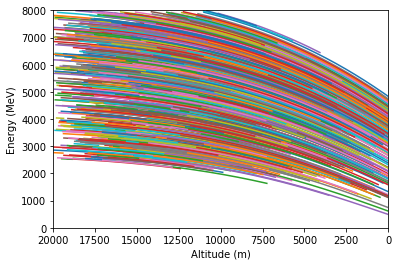

In [ ]:
xi = 1000000
xf = 2000000
Ei = 2500
Ef = 8000
ti = 0
tf = 80
N = 1000
xrand = np.zeros(N) #Initializes array for random Initial altitudes
Erand = np.zeros(N) #Initializes array for random Initial Energies
thetarand = np.zeros(N) #Initializes array for random Initial Zenith Angles
for j in range(0,N):
  xrand[j] = random.randrange(xi,xf) #Randomizes Initial Altitudes
  Erand[j] = random.randrange(Ei,Ef) #Randomizes Initial Energies
  thetarand[j] = random.randrange(ti,tf) #Randomizes Initial Zenith Angles

for i in range(0,N):  #Calculates Energy vs Altitude of N Muons
  resultrand = Muon(Erand[i],xrand[i],thetarand[i])
  xfin2 = np.divide(resultrand[1],100)
  plt.plot(xfin2,resultrand[0])

plt.xlim(20000,0) 
plt.ylim(0,8000)
plt.xlabel("Altitude (m)")
plt.ylabel("Energy (MeV)")
plt.show()


##Total Energy of Muons


Text(0, 0.5, 'Total Energy (MeV)')

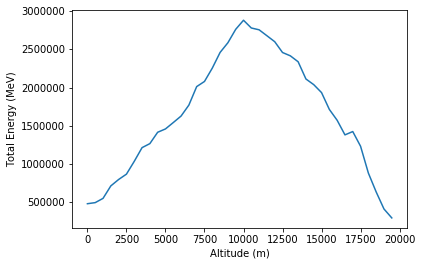

In [ ]:
totalenergy = np.zeros(40)   # Alter this to only take the energy of altitudes every 5000 units
alt = np.arange(0,xf,50000)
l = 0
for p in range (0,xf,50000):
  for k in range(0,N):
    totalenergy[l] += CallEnergy(Erand[k],xrand[k],p,thetarand[k],0)   #Change fourth variable in Call energy to choose zenith angle. (0-80)
  l+=1

xfin2 = np.divide(alt,100)
plt.plot(xfin2,totalenergy)
plt.xlabel("Altitude (m)")
plt.ylabel("Total Energy (MeV)")